### Задача 1

In [156]:
% matplotlib inline
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
# здесь N и K не очень большие, чтобы меньше было ждать
N = 100
K = 100
n = np.arange(1, N + 1)

#функции вычисляющие среднее выборочное и выборочную дисперсию
def sample_mean(X):
    return X.cumsum() / n

def sample_var(X):
    Y = (X**2).cumsum() / n - (X.cumsum() / n)**2
    Y[0] = 1e-9
    return Y

In [157]:
#параметрический бутстреп
#функцию которой мы будем использовать для вычисления параметрических бутстрепов
def but_param(Array_estimates, get_estimate, param, params):
    Array_but = []
    for i in range(Array_estimates.shape[0]):
        but = []
        for j in range(Array_estimates[i].size):
            temp_but = np.zeros(K)
            for k in range(K):
                temp_but[k] = get_estimate(i, j)
            but.append(temp_but)
        but = np.array(but)
        Array_but.append(but)
    Array_but = np.array(Array_but)
    plt.figure(figsize=(16, 6))
    for i in range(Array_but.shape[0]):
        var = np.zeros(Array_but[i].shape[0])
        for j in range(Array_but[i].shape[0]):
            X = Array_but[i][j]
            var[j] = np.average(X**2) - np.average(X)**2
        plt.subplot(1, Array_but.shape[0], i + 1)
        plt.title(r'' + param + r'$=$' + str(params[i]), fontsize=20)
        plt.plot(n, var)
        plt.xlabel(r'$n$', fontsize=12)
        plt.ylabel(r'$s^2(\hat{\theta^2})$', fontsize=12)
        plt.grid()

In [153]:
#непараметрический бутстреп
#аналогично для непараметрического
def but_unparam(Array_X, get_estimate, param, params):
    Array_but = []
    for i in range(Array_X.shape[0]):
        but = []
        for j in range(Array_X[i].shape[0]):
            X = Array_X[i][:j + 1]
            #M = min(j + 1, 20)
            M = j + 1
            temp_but = np.zeros(K)
            for k in range(K):
                numbers = np.random.choice(np.arange(0, j + 1), M)
                 #print(j, numbers)
                temp_but[k] = get_estimate(np.array([X[p] for p in numbers]))
            but.append(temp_but)
        but = np.array(but)
        Array_but.append(but)
    Array_but = np.array(Array_but)
    plt.figure(figsize=(16, 6))
    for i in range(Array_but.shape[0]):
        var = np.zeros(Array_but[i].shape[0])
        for j in range(Array_but[i].shape[0]):
            X = Array_but[i][j]
            var[j] = np.average(X**2) - np.average(X)**2
        plt.subplot(1, Array_but.shape[0], i + 1)
        plt.title(r'' + param + r'$=$' + str(params[i]), fontsize=20)
        plt.plot(n, var)
        plt.xlabel(r'$n$', fontsize=12)
        plt.ylabel(r'$s^2(\hat{\theta^2})$', fontsize=12)
        plt.grid()

* **Нормальное распределение** $N(a, \sigma^2)$:

**Парметрический бутстреп**

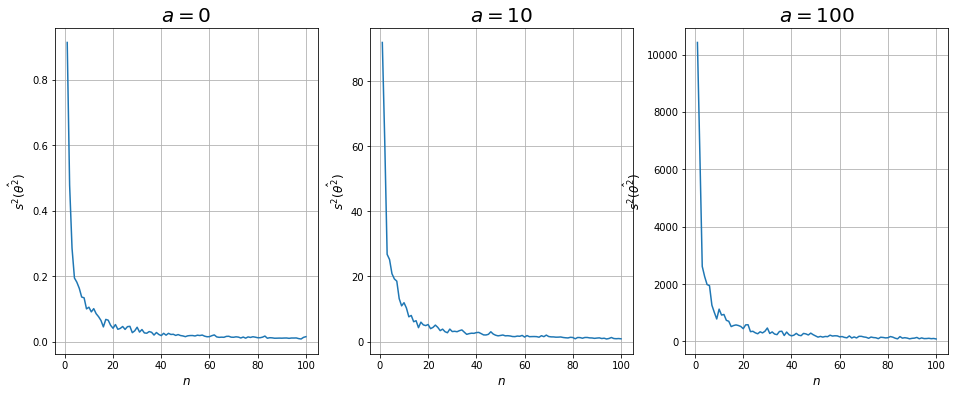

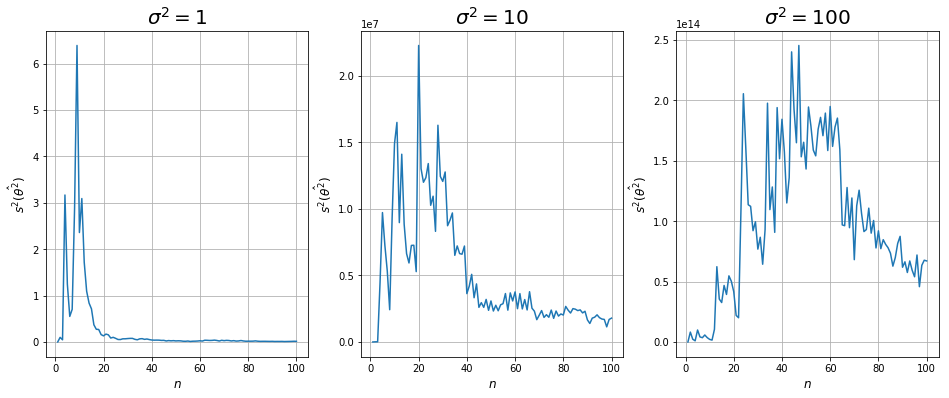

In [158]:
#параметры
a = np.array([0, 10, 100])
sigma = np.array([1, 10, 100])
#генерируем выборку
Array_X = np.array([sps.norm.rvs(size=N, loc=a[i], scale=sigma[i]) for i in range(a.size)])
#нашли оценки
Array_estimates_a = np.array([sample_mean(X) for X in Array_X])
Array_estimates_sigma = np.array([sample_var(X) for X in Array_X])

#здесь мы определим функции, которыми будем ползоваться при подсчете бутсрепа
#для каждого распределения подсчет оценки свой
def get_estimate_for_a_param(i, j):
    return np.average(sps.norm.rvs(size=n[j], loc=Array_estimates_a[i][j], scale=sigma[i]))

def get_estimate_for_sigma_param(i, j):
    X = sps.norm.rvs(size=n[j], loc=a[i], scale=Array_estimates_sigma[i][j])
    return np.average(X**2) - np.average(X)**2

#расчет и построение графиков
but_param(Array_estimates_a, get_estimate_for_a_param, '$a$', a)
but_param(Array_estimates_sigma, get_estimate_for_sigma_param, '$\sigma^2$', sigma)

**Непараметрический бутстреп**

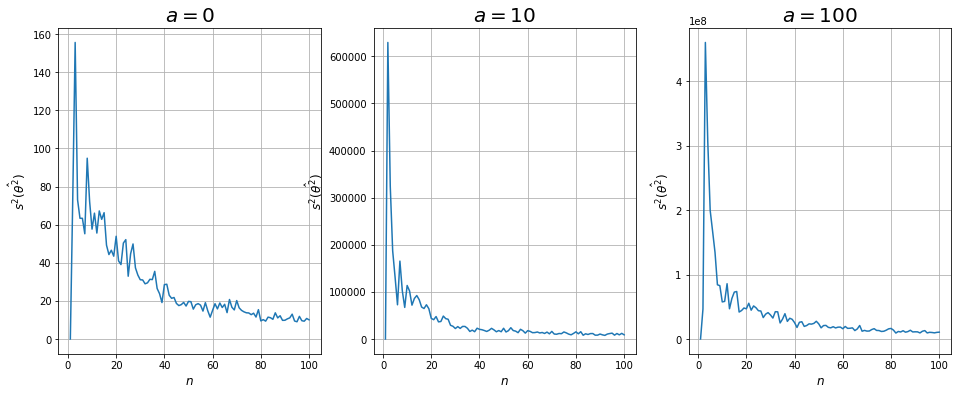

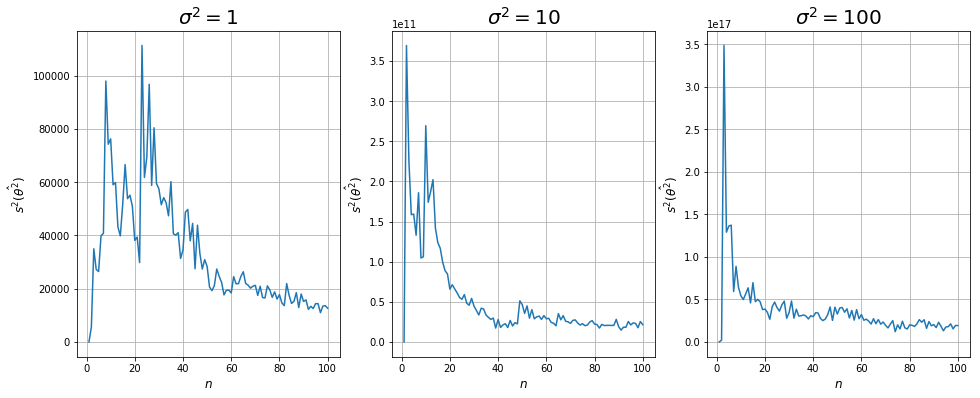

In [110]:
#здесь аналогично, только для непараметрического бутсрепа
def get_estimate_for_a_unparam(X):
    return np.average(X)

def get_estimate_for_sigma_unparam(X):
    return np.average(X**2) - np.average(X)**2

but_unparam(Array_X, get_estimate_for_a_unparam, '$a$', a)
but_unparam(Array_X, get_estimate_for_sigma_unparam, '$\sigma^2$', sigma)

* **Гамма распределение** $\Gamma(\alpha, \lambda)$:

**Параметрическое распределение**

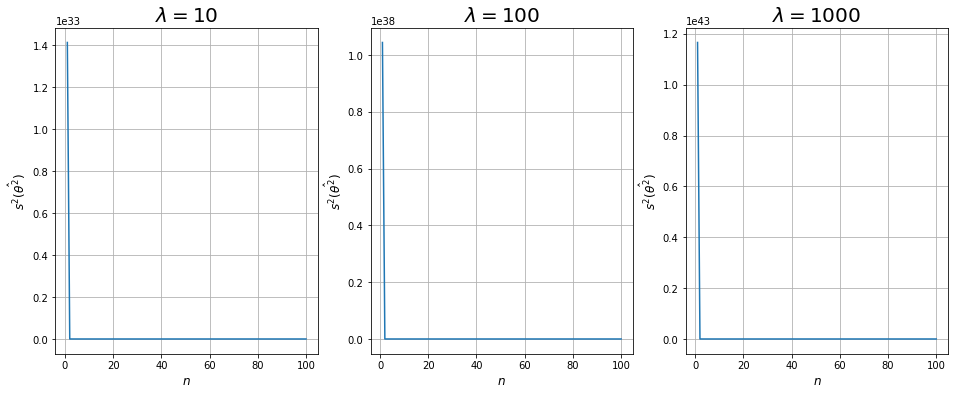

In [112]:
#параметры
alpha = np.array([10, 100, 1000])
Lambda = np.array([10, 100, 1000])
Array_X = np.array([sps.gamma.rvs(size=N, scale=Lambda[i], a=alpha[i]) for i in range(alpha.size)])
#нашли оценки
Array_estimates_alpha = np.array([sample_mean(X)**2 / sample_var(X) for X in Array_X])
Array_estimates_Lambda = np.array([sample_mean(X) / sample_var(X) for X in Array_X])

def get_estimate_for_alpha_param(i, j):
    return np.average(sps.gamma.rvs(size=n[j], a=Array_estimates_alpha[i][j], scale=Lambda[i]))

def get_estimate_for_Lambda_param(i, j):
    X = sps.gamma.rvs(size=n[j], a=alpha[i], scale=Array_estimates_Lambda[i][j])
    return np.average(X) / (np.average(X**2) - np.average(X)**2 + 1e-5)

#but_param(Array_estimates_alpha, get_estimate_for_alpha_param, '$\alpha$', alpha)
but_param(Array_estimates_Lambda, get_estimate_for_Lambda_param, '$\lambda$', Lambda)

**Непараметрический бутсреп**

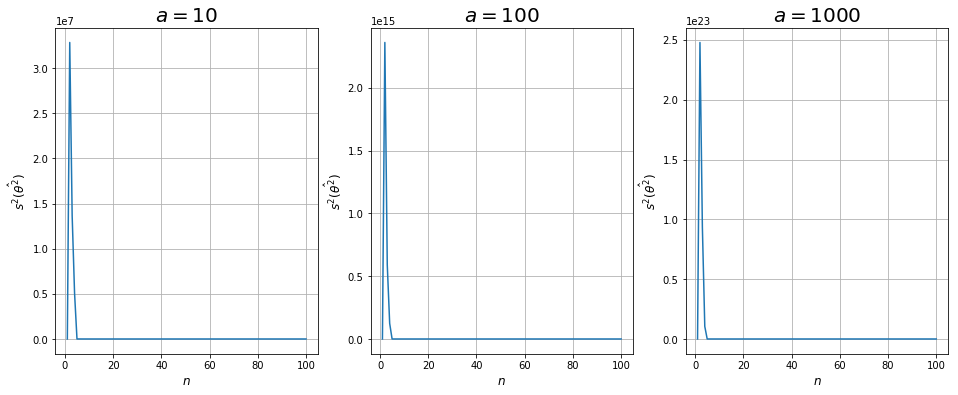

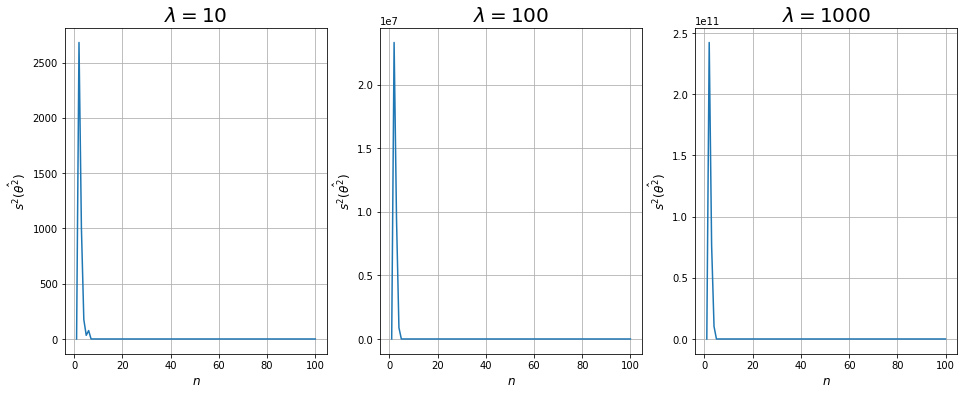

In [114]:
def get_estimate_for_alpha_unparam(X):
    return np.average(X)**2 / (np.average(X**2) - np.average(X)**2 + 1e-9) 

def get_estimate_for_Lambda_unparam(X):
    return np.average(X) / (np.average(X**2) - np.average(X)**2 + 1e-9) 

but_unparam(Array_X, get_estimate_for_alpha_unparam, '$a$', alpha)
but_unparam(Array_X, get_estimate_for_Lambda_unparam, '$\lambda$', Lambda)

* **Равномерное распределение** $R(a, b)$:

**Параметрический бутсреп**

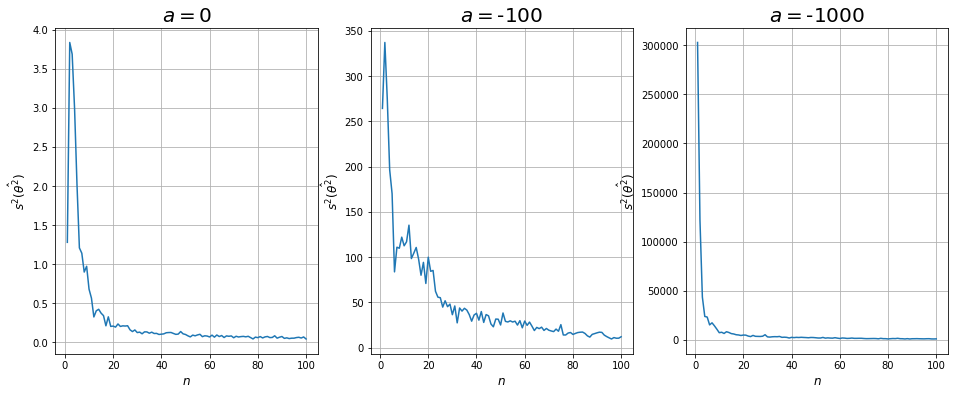

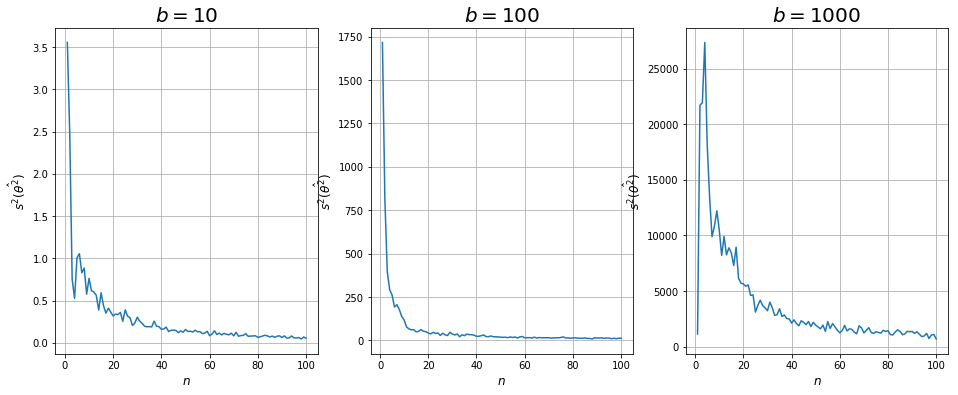

In [128]:
#параметры
a = np.array([0, -100, -1000])
b = np.array([10, 100, 1000])
Array_X = np.array([sps.uniform.rvs(size=N, loc=a[i], scale=b[i] - a[i]) for i in range(a.size)])
#нашли оценки
Array_estimates_a = np.array([sample_mean(X) - (sample_var(X) * 3)**(1/3) for X in Array_X])
Array_estimates_b = np.array([sample_mean(X) + (sample_var(X) * 3)**(1/3) for X in Array_X])

def get_estimate_for_a_param(i, j):
    X = sps.uniform.rvs(size=n[j], loc=Array_estimates_a[i][j], scale=b[i] - Array_estimates_a[i][j])
    return np.average(X) - (3 * (np.average(X**2) - np.average(X)**2))**(1/3)

def get_estimate_for_b_param(i, j):
    X = sps.uniform.rvs(size=n[j], loc=a[i], scale=Array_estimates_b[i][j] - a[i])
    return np.average(X) + (3 * (np.average(X**2) - np.average(X)**2))**(1/3)

but_param(Array_estimates_a, get_estimate_for_a_param, '$a$', a)
but_param(Array_estimates_b, get_estimate_for_b_param, '$b$', b)

**Непараметрический бутстреп**

/home/sikalovnikita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sikalovnikita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


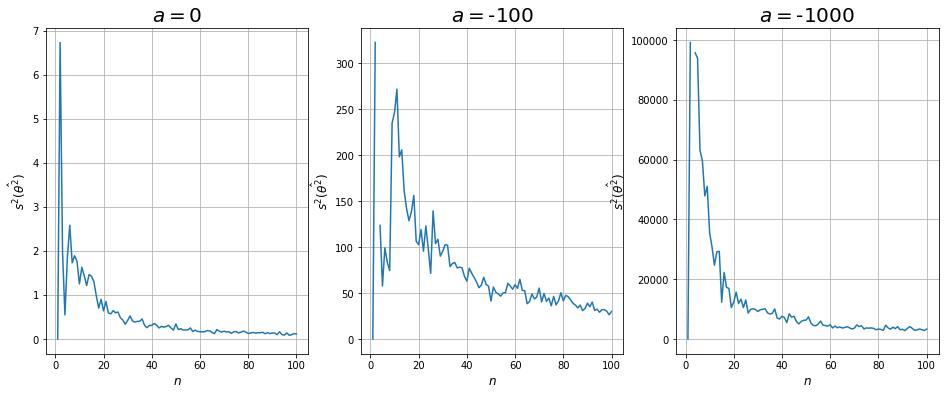

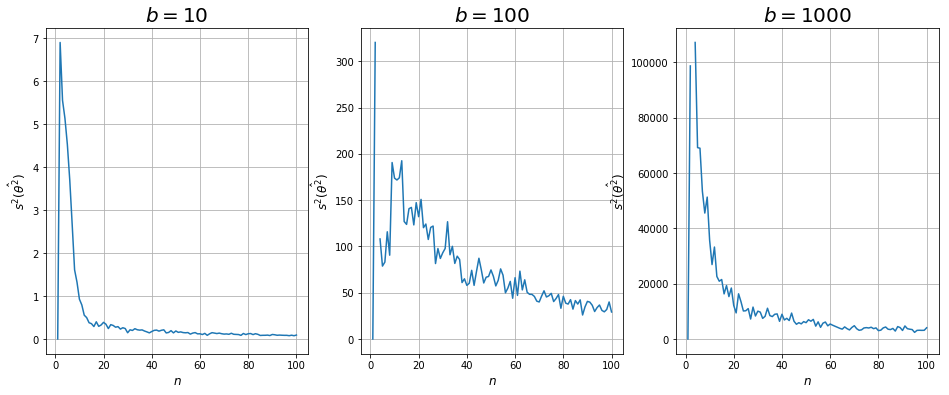

In [130]:
def get_estimate_for_a_unparam(X):
    return np.average(X) - (3 * (np.average(X**2) - np.average(X)**2))**(1/3) 

def get_estimate_for_b_unparam(X):
    return np.average(X) + (3 * (np.average(X**2) - np.average(X)**2))**(1/3)

but_unparam(Array_X, get_estimate_for_a_unparam, '$a$', a)
but_unparam(Array_X, get_estimate_for_b_unparam, '$b$', b)

* **Пуассоноское распределение** $Pois(\lambda)$:

**Параметрический бутстреп**

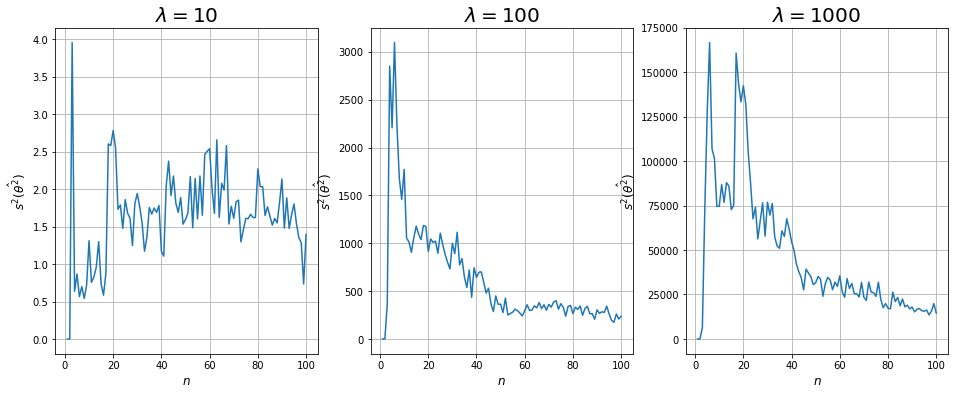

In [135]:
#параметры
Lambda = np.array([10, 100, 1000])
Array_X = np.array([sps.poisson.rvs(size=N, mu=Lambda[i]) for i in range(a.size)])
#нашли оценки
Array_estimates_Lambda = np.array([sample_var(X) for X in Array_X])

def get_estimate_for_Lambda_param(i, j):
    X = sps.poisson.rvs(size=n[j], mu=Array_estimates_Lambda[i][j])
    return np.average(X**2) - np.average(X)**2

but_param(Array_estimates_Lambda, get_estimate_for_Lambda_param, '$\lambda$', Lambda)

**Непараметрический бутстреп**

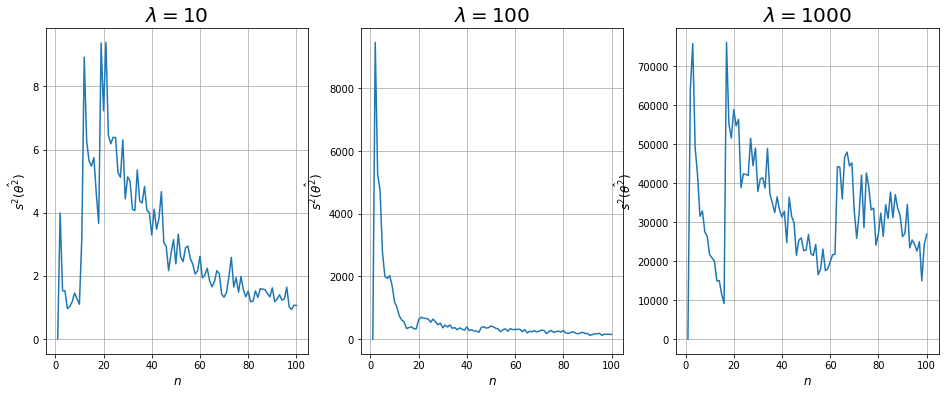

In [134]:
def get_estimate_for_Lambda_unparam(X):
    return np.average(X**2) - np.average(X)**2

but_unparam(Array_X, get_estimate_for_Lambda_unparam, '$\lambda$', Lambda)

* **Биномиальное распределение** $Bin(m, p)$:

**Параметрический бутстреп**

2.000000001


/home/sikalovnikita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/home/sikalovnikita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
/home/sikalovnikita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/home/sikalovnikita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


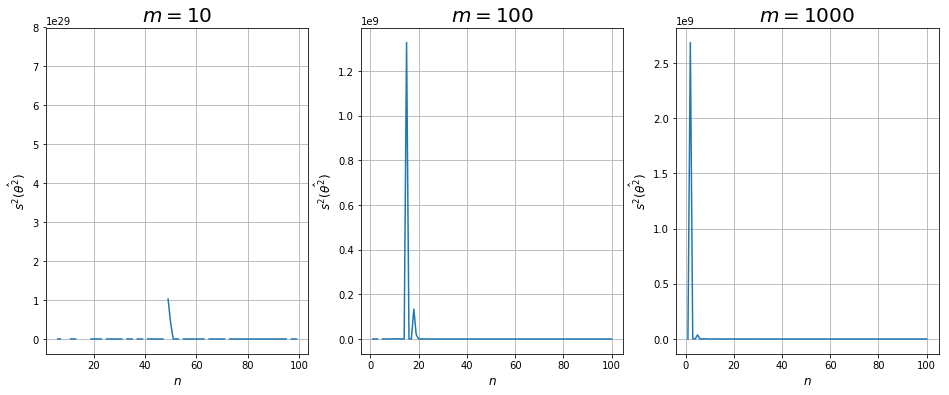

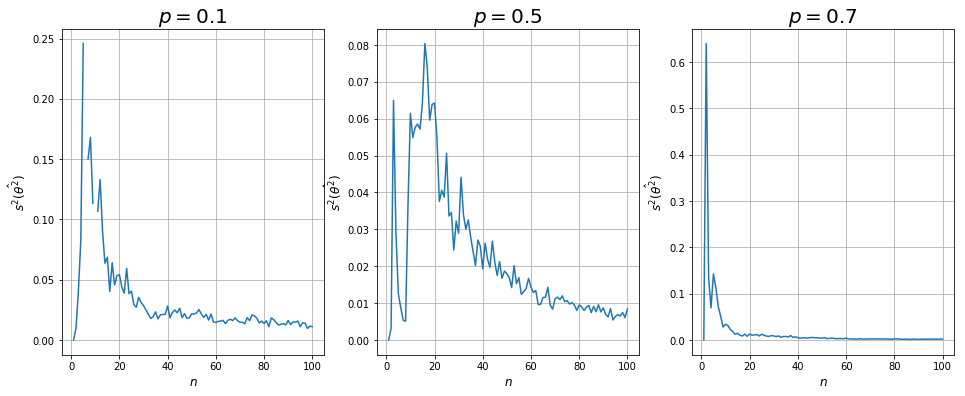

In [144]:
#параметры
m = np.array([10, 100, 1000])
p = np.array([0.1, 0.5, 0.7])
Array_X = np.array([sps.binom.rvs(size=N, n=m[i], p=p[i]) for i in range(a.size)])
#нашли оценки
Array_estimates_m = np.array([sample_mean(X)**2 / (sample_mean(X) - sample_var(X)) for X in Array_X])
Array_estimates_p = np.array([(sample_mean(X) - sample_var(X)) / sample_mean(X) for X in Array_X])

def get_estimate_for_m_param(i, j):
    X = sps.binom.rvs(size=n[j], n=int(Array_estimates_m[i][j]), p=p[i])
    return np.average(X)**2 / (np.average(X) - (np.average(X**2) - np.average(X)**2))

def get_estimate_for_p_param(i, j):
    X = sps.binom.rvs(size=n[j], p=Array_estimates_p[i][j], n=m[i])
    return (np.average(X) - (np.average(X**2) - np.average(X)**2)) / np.average(X)

but_param(Array_estimates_m, get_estimate_for_m_param, '$m$', m)
but_param(Array_estimates_p, get_estimate_for_p_param, '$p$', p)

**Непараметрический бутстреп**

/home/sikalovnikita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/sikalovnikita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


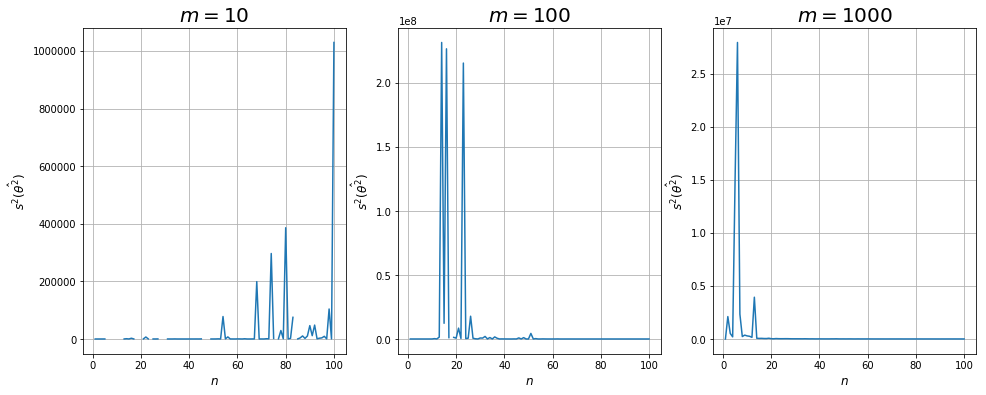

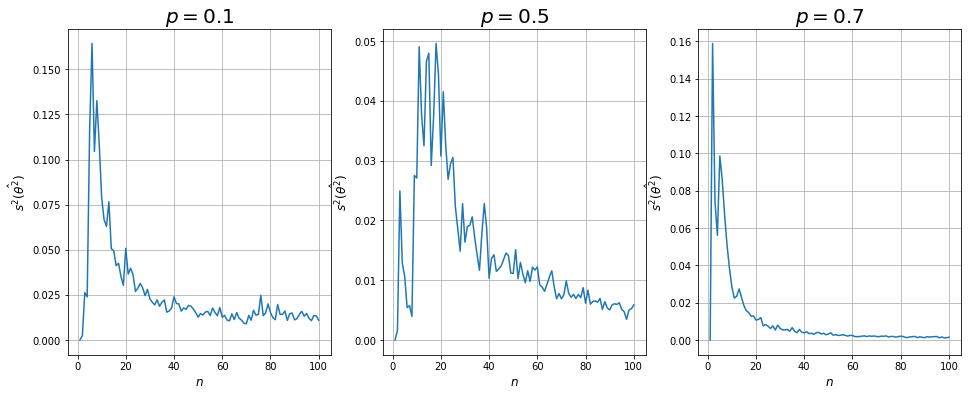

In [145]:
def get_estimate_for_m_unparam(X):
    return np.average(X)**2 / (np.average(X) - (np.average(X**2) - np.average(X)**2)) 

def get_estimate_for_p_unparam(X):
    return (np.average(X) - (np.average(X**2) - np.average(X)**2)) / np.average(X)

but_unparam(Array_X, get_estimate_for_m_unparam, '$m$', m)
but_unparam(Array_X, get_estimate_for_p_unparam, '$p$', p)

* **Геометрическое распределение** $Geom(p)$:

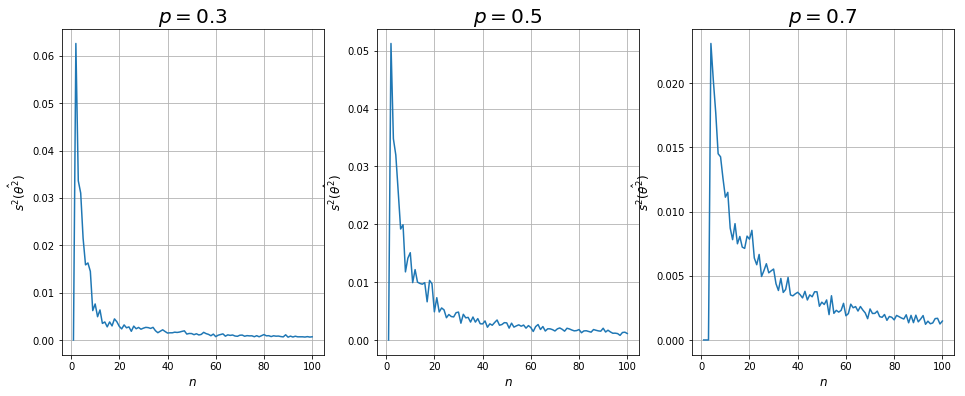

In [147]:
#параметры
p = np.array([0.3, 0.5, 0.7])
Array_X = np.array([sps.geom.rvs(size=N, p=p[i]) for i in range(p.size)])
#нашли оценки
Array_estimates_p = np.array([1 / sample_mean(X) for X in Array_X])

def get_estimate_for_p_param(i, j):
    X = sps.geom.rvs(size=n[j], p=Array_estimates_p[i][j])
    return 1 / np.average(X)

but_param(Array_estimates_p, get_estimate_for_p_param, '$p$', p)

Тут у меня заканчивается терепение и время. Потрачу его на что-то более полезное... Дальше все аналогично. 

---
### Задача 2

Оценка параметра сдвига = 662.05. При размере выборки = 1000
Оценка параметра сдвига = 662.04. При размере выборки = 500


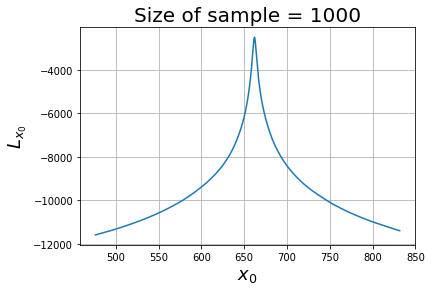

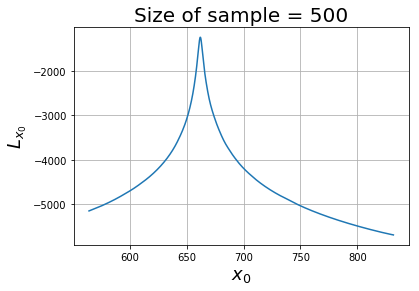

In [64]:
import pandas as pd

def LikeHoodMethod(sample): #функция которя будет возвращать оценку параметра сдвига методом макс правдоподобия
    left = np.min(sample)  #таким образом мы ограничим интервал поиска, так для распределения Коши, пик плотности
    right = np.max(sample) #распределения приходится именно на параметр сдвига, поэтому логично ожидать что он будет
    #между минимальным и максимальным элементом выборки
    grid = np.arange(left, right, 0.01) #создаем сетку с шагом 0.01
    max_like_hood_function = np.zeros(grid.size) 
    index = 0
    for x_0 in grid:
        res = 1.
        ppf = sps.cauchy.pdf(sample, loc=x_0)  #плотность распределения в точках выборки
        log_p = np.log(ppf) #логарифмирем плотность
        max_like_hood_function[index] = log_p.sum()  #считам ln() от обобщенной плотности, 
        index += 1  #понятно что это будет просто сумма элементов массива log_p
    plt.figure() #строим графики для наглядности
    plt.title('Size of sample = ' + str(sample.size), fontsize=20)
    plt.plot(grid, max_like_hood_function)
    plt.ylabel(r'$L_{x_0}$', fontsize=18)
    plt.xlabel(r'$x_0$', fontsize=18)
    plt.grid()
    return grid[np.argmax(max_like_hood_function)]  #возвращаем оценку 

array = pd.read_csv("Cauchy.csv", header=None)  #считывание данных
sample = np.array(array).ravel()  #все данные
half_sample = sample[:500].copy()  #половина данных
print('Оценка параметра сдвига = {0}. При размере выборки = {1}' \
      .format(round(LikeHoodMethod(sample), 2), str(sample.size)))
print('Оценка параметра сдвига = {0}. При размере выборки = {1}' \
      .format(round(LikeHoodMethod(half_sample), 2), str(half_sample.size)))

Ну тут вроде все видно и понятно, нашли оценку параметра сдвига по максимуму функции правдоподобия. Все остальное я пояснял уже в комментариях. Проблем особо не возникло.

---
### Задача 3

In [88]:
import pandas as pd

def exchange_zeros(sample):
    sample_min = np.min(np.extract(sample != 0, sample))
    for i in range(sample.size):
        if (sample[i] == 0):
            sample[i] = sample_min
    return sample

def LikeHoodMethod(sample): #функция которя будет возвращать оценку параметра сдвига методом макс правдоподобия
    step = 10**(-3)  #шаг задающий точность 
    grid = np.arange(-2., 2. + step , step) #задаем логарифмическую сетку
    gamma = np.ones(grid.size)*10 ** grid #обычная сетка
    max_like_hood_function = np.zeros(grid.size) #создаем массив для значений функции правдоподобия
    for i in range(grid.size):
        pdf = sps.weibull_min.logpdf(sample, c=gamma[i])  #логарифмическая плотность распределения в точках выборки
        max_like_hood_function[i] = np.sum(pdf) #считаем функцию правдоподобия
    plt.figure()   
    #строим графики для наглядности, только на ограниченном участке!(на всем нет смысла) 
    plt.title('Size of sample = ' + str(sample.size), fontsize=20)
    plt.plot(gamma, max_like_hood_function)
    plt.ylabel(r'$L_{x_0}$', fontsize=18)
    plt.xlabel(r'$x_0$', fontsize=18)
    plt.xlim(0, 1)
    plt.ylim(np.max(max_like_hood_function) * 10, 200)
    plt.grid()
    return gamma[np.argmax(max_like_hood_function)]  #возвращаем оценку

Оценка параметра формы: 0.959400631515451 для 4 лет
Оценка параметра формы: 0.9440608762854505 для 10 лет


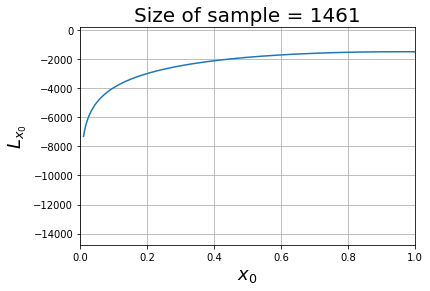

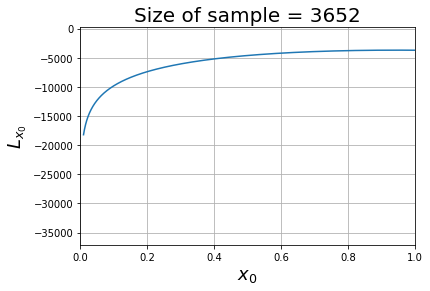

In [89]:
array = pd.read_csv("Weibull.csv", header=None)  #считывание данных
sample = np.array(array).ravel()  #все данные
#заменяем нули на минимумы, чтобы для любого параметра вейбуловского распределения
#существовала плотность распределения в каждой точке
sample = exchange_zeros(sample) 
print("Оценка параметра формы: {0} для 4 лет".format(LikeHoodMethod(sample[:365*4 + 1]))) #можно было посчитать плотность
print("Оценка параметра формы: {0} для 10 лет".format(LikeHoodMethod(sample)))

Здесь аналогичено 2-ой задаче, единственное с чем возникла проблема - это с тем, что в выборке были 0, но нам сказали их поменять на наименьший ненулевой элемент в выборке. Также здесь важно было брать именно log плотность, иначе из-за нехватки точности мы могли получить просто 0 (если бы брали отдельно сначала потность, а потом ее логарифмировали) и не смогли бы взять потом log отдельно от этой плотности в некоторых точках.  